In [8]:
!pip install --upgrade joblib==1.1.0
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 9.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=0756cfedd645a41776fee796f538d1cb67b1f4c54afc9a24fa067d1984131ed7
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [9]:
import mglearn

In [3]:
!apt -qq -y install fonts-nanum > /dev/null

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# clustering

클러스터링은 비지도 학습방법이므로 label(정답)이 존재하지 않는 상태에서 학습을 통해 비슷한 개체끼리 그룹으로 묶는다.   
만약 label이 존재하면서 그룹으로 나눈다면 그것은 지도학습의 분류(Classification) 모델이다.

# k-Means


*   K개의 랜덤한 중심점으로부터 가까운 데이터들을 묶는 군집화 기법
*   평균을 사용함에 따라 이상치에 민감
*   거리를 재기 때문에 스케일링 필수
*   초기 중심에 민감
*   k_means++ : 초기 중심점 선정의 어려움을 해결하기 위한 방법
*   주요 파라미터 : n_clustors: 군집수 , init : 기본값이 k_means++



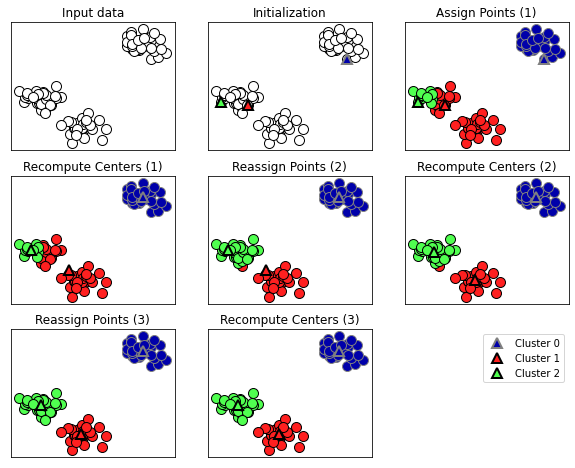

In [10]:
mglearn.plots.plot_kmeans_algorithm()

# 모델 학습

In [11]:
from sklearn.datasets import make_blobs

#인위적으로 2차원 데이터를 생성
X, y = make_blobs(random_state=1)
X.shape, y.shape

((100, 2), (100,))

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [13]:
# 학습한 라벨 확인
kmeans.labels_

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0], dtype=int32)

In [15]:
#새로운 데이터 예측하기
kmeans.predict(X)

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0], dtype=int32)

In [16]:
y

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

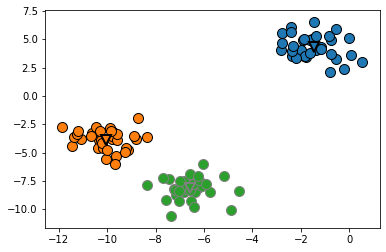

In [18]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
    [0, 1, 2], markers='v', markeredgewidth=2
)

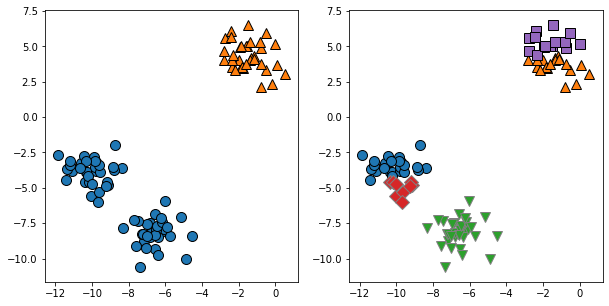

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# 2개로 줄이자
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, ax=axes[0])

# 5개로 늘리자
kmeans = KMeans(n_clusters=5) 
kmeans.fit(X)
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, ax=axes[1])

# k-means 실패하는 경우

각 클러스터를 정의하는 것이 중심 하나뿐임으로 클러스터는 둥근 형태이면서
데이터가 밀집되어 있어야 효과가 있습니다.

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  func(*args

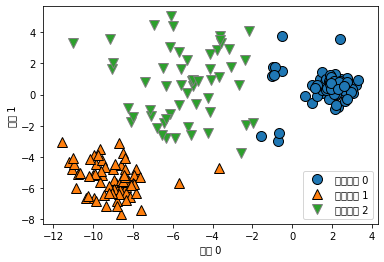

In [21]:
x_data, y_data = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
kmeans = KMeans(n_clusters=3, random_state=0).fit(x_data)

mglearn.discrete_scatter(x_data[:,0], x_data[:,1], kmeans.labels_)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


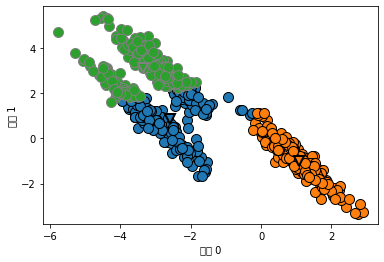

In [22]:
# 둥근 형태가 아닌 데이터
x_data, y_data = make_blobs(random_state=170, n_samples=600) # 무작위 클러스터 데이터 생성

rng = np.random.RandomState(74)
transformation = rng.normal(size=(2,2)) 
x_data = np.dot(x_data, transformation) # 데이터를 길죽하게 변경

kmeans = KMeans(n_clusters=3).fit(x_data) 

mglearn.discrete_scatter(x_data[:,0], x_data[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
    [0,1,2], markers='v', markeredgewidth=2
)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

# 군집 타당성 평가

클러스터링은 정답이 없기 때문에 지도학습에서 사용하는 Accuracy 등의 지표로 평가할 수 없다. 아래 예에서 볼 수 있듯 최적의 군집 개수를 정답 없이 알아내기란 
쉽지 않다.

### 손글씨 데이터 로드

In [23]:
SEED = 42

In [24]:
from sklearn.datasets import load_digits

digits = load_digits()
x = digits.data / 255
y = digits.target
x.shape, y.shape

((1797, 64), (1797,))

In [25]:
np.random.seed(SEED)
idx = np.arange(x.shape[0])
np.random.shuffle(idx)
x = x[idx]
y = y[idx]
x.shape, y.shape

((1797, 64), (1797,))

In [26]:
kmeans = KMeans(n_clusters=10, random_state=SEED)
kmeans.fit(x)

KMeans(n_clusters=10, random_state=42)

### 사전에 정의된 그룹이 있는 경우

##### homogeneity : 각 군집(예측값)이 동일한 클래스(실제값)로 구성되어 있는 정도 
#####completeness : 각 클래스(실제값)에 대하여 동일한 군집(예측값)으로 구성되어 있는 정도
##### v_measure : homogeneity와 completeness의 조화 평균

In [27]:
from sklearn.metrics import homogeneity_score

homogeneity_score(y, kmeans.labels_)

0.7378058968326526

In [28]:
from sklearn.metrics import completeness_score

completeness_score(y, kmeans.labels_)

0.7458562193736206

In [29]:
from sklearn.metrics import v_measure_score

completeness_score(y,kmeans.labels_)

0.7458562193736206

### 사전에 정의된 그룹이 없는 경우

실루엣 계수

*   밀집된 클러스터에는 좋지만, 모양이 복잡할 때는 평가가 잘 들어맞지 않다.
*   군집내의 거리는 짧을수록, 군집간의 거리는 갈수록 좋은 군집화이다. 이 부분을 평가하기 위한 지표
*   -1 ~ 1의 값을 가진다.

    *   1에 가까울 수록 명확하게 군집화됨을 의미
    *   0에 가까울 수록 군집간의 거리가 가까워진다는 것을 의미
    *   음수일 경우 잘못된 방식으로 군집화됨을 의미

In [30]:
from sklearn.metrics import silhouette_score

silhouette_score(x, kmeans.labels_)

0.18226446312670963

# Overview of Clustering methods

In [37]:
def print_score(x, y, pred):
  print(f"homogeneity: {homogeneity_score(y, pred)}")
  print(f"completeness: {completeness_score(y, pred)}")
  print(f"v_measure: {v_measure_score(y, pred)}")
  print('-'*50)
  print(f"silhouette: {silhouette_score(x, pred)}")

# MiniBatchKMeans



*   mini-batch 개수만큼 무작위로 분리하여 K-Means 군집화를 한다.
*   속도가 훨씬 빠르다.



In [38]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=10, random_state=SEED, batch_size=512).fit(x)
print_score(x, y, kmeans.labels_)

homogeneity: 0.7129288903522628
completeness: 0.7288991277425318
v_measure: 0.7208255628252749
--------------------------------------------------
silhouette: 0.18472538252636414


# Agglomerative Clustering(병합 군집)

지정된 개수의 클러스터가 남을 때까지 비슷한 클러스터를 합치는 알고리즘이다.

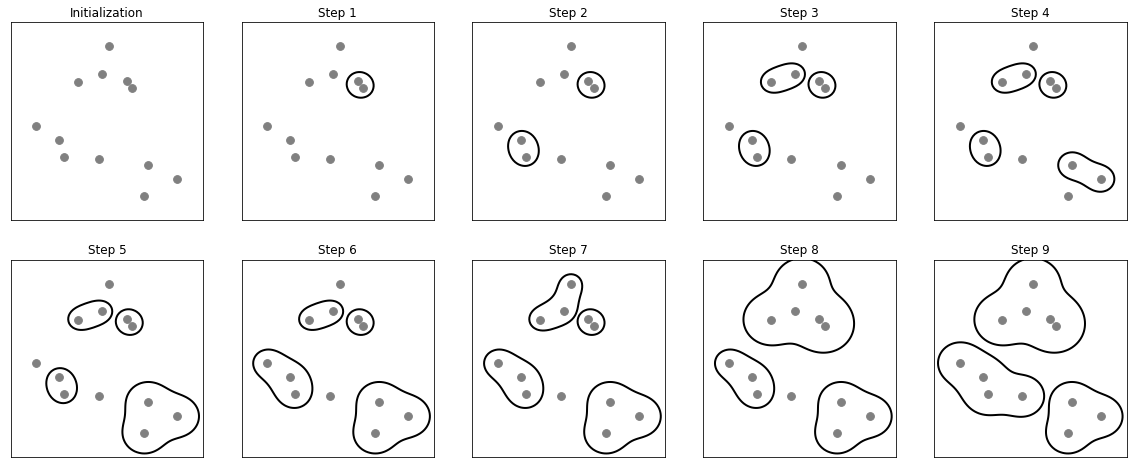

In [35]:
mglearn.plots.plot_agglomerative_algorithm()

In [39]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=10).fit(x)
print_score(x,y,ac.labels_)

homogeneity: 0.8575128719504723
completeness: 0.8790955851724198
v_measure: 0.8681701126909083
--------------------------------------------------
silhouette: 0.17849659940596496


# DBSCAN



*   클러스터의 개수를 미리 지정할 필요 없음
*   밀도기반 클러스터링
*   데이터 샘플들이 몰려있는 지점을 찾아 묶어서 군집화
*   주요 파라미터

    *   eps : 이웃으로 판단하는 최대거리
    *   min_samples : 이웃 반경 내 최소 샘플수





min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


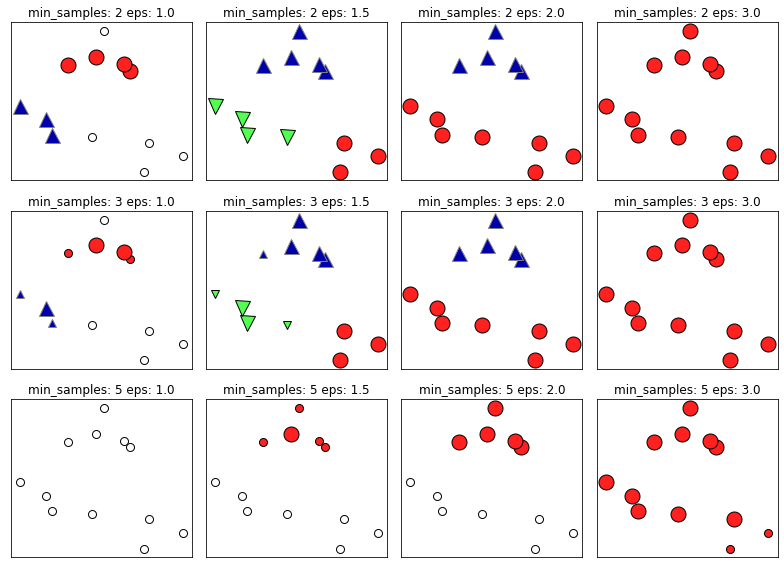

In [40]:
mglearn.plots.plot_dbscan()

In [42]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=3, eps=0.05, n_jobs=-1).fit(x)
print_score(x,y,dbscan.labels_)

homogeneity: 0.07120590002352155
completeness: 0.35826557533497766
v_measure: 0.11880007964616032
--------------------------------------------------
silhouette: -0.29235730958906886
